<a href="https://colab.research.google.com/github/RSAmanda/Alura_Desafio_Dados_ENEM2021/blob/main/dados_enem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Atividade desenvolvida na live

live do dia 13/02 - 19 horas - Alura para Empresas

https://www.youtube.com/watch?v=L-DunLY-XDc

##Dados utilizados

https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

##Tópicos apredentados durante a aula
- Aspectos gerais do google colab;
- Biblioteca PANDAS e MATPLOTLIB;
- Como trabahar com arquivos;
- Como fazer gráfico de pizza.

##Desafio
Visualize os dados somente da coluna SG_UF_PROVA e faça uma contagem para sabermos o número de participantes por estado
Faça uma plotagem da contagem de participantes por estado com a função plt.bar()

- Dica: use a documentação do matplotlib.pyplot

Explore outras 5 colunas.


Use células de texto para explicar suas células de códigos.

Compartilhe no Discord e/ou LinkedIn.



# Atenção:

Análise exploratória focada no aprendizado da linguagem de programação Python..


## Materiais úteis:

Cores: https://celke.com.br/artigo/tabela-de-cores-html-nome-hexadecimal-rgb

In [ ]:
#acessando informações do google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
#pd é um 'apelido' que atribuimos a biblioteca pandas
# para fazer gráficos
import matplotlib.pyplot as plt 

import numpy as np
# para fazer mapas
!pip install geopandas
import geopandas as gpd

!pip install pywaffle
from pywaffle import Waffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 22.9 MB/s eta 0:00:00


Importando os dados. Formando CSV. Encoding = latin1 (ISO8859-1)

In [ ]:
dataset_enem = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Live_Alura_2023_02_13/MICRODADOS_ENEM_2021.csv', encoding = 'latin1', sep=';')
#latin1 = ISO8859-1

Para sabermos as dimensões do dataframe 'dataset_enem' usando o .shape
onde:

shape(0) -> quantidade de linhas

shape(1) -> quantidade de colunas

Como cada linha representa um inscrito na prova do enem, será utilizado a quantidadde de linhas para indentidicar o total de inscritos.

Cada linha do dataset_enem representa um inscrito(a) no Exame Nacional do Ensino Médio de 2021 (ENEM 2021).

E cada coluna um parâmetro, como o número de inscrição, estado, resultados das provas, questões socioeconômicas e entre outros.

In [ ]:
dataset_enem.shape[0]

3389832

In [ ]:
insc_tot = dataset_enem.shape[0]

Será feita uma análise exploratória das informações fornecidas pelo governo federal sobre o ENEM 2021.

###Trabalhando com os dados da coluna 'TP_SEXO'

Primeiro verificaremos o padrão dos dados. Nota-se que só há valores 'F' e 'M'.
Onde F indica sexo feminino e M sexo masculina, não ocorrendo outras ocorrências de resultados. 

In [ ]:
dataset_enem['TP_SEXO'].unique()

array(['F', 'M'], dtype=object)

Para sabermos a quantidade de inscritos por sexo, podemos utilizar a função:
.value_count()

In [ ]:
dataset_enem['TP_SEXO'].value_counts()

F    2090526
M    1299306
Name: TP_SEXO, dtype: int64

In [ ]:
insc_F, insc_M = dataset_enem['TP_SEXO'].value_counts()

In [ ]:
insc_p_sexo = (100*insc_F/insc_tot, 100*insc_M/insc_tot) #porcentagem de inscritos por sexo

### Gráfico Pizza/Torta - Gênero dos Inscritos no enem de 2021

Text(0.5, 1.0, 'Gênero dos inscritos no ENEM - 2021')

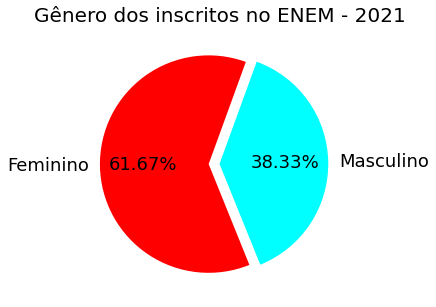

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
labels = ("Feminino", "Masculino")
explode = (0.10, 0) #distâncias entre as fatias
ax.pie(insc_p_sexo,
       labels=labels,
       autopct="%.2f%%",
       shadow=False,
       explode=explode,
       startangle=70,
       colors=["red", "cyan"],
       textprops={'fontsize': 18})
ax.set_title('Gênero dos inscritos no ENEM - 2021', fontsize=20)

Pode-se notar que ocorreram mais inscritas do que inscritos na prova do ENEM DE 2021

### Gráfico Barra - Inscritos por Unidade Federativa

Text(0, 0.5, 'Unidade Federativa')

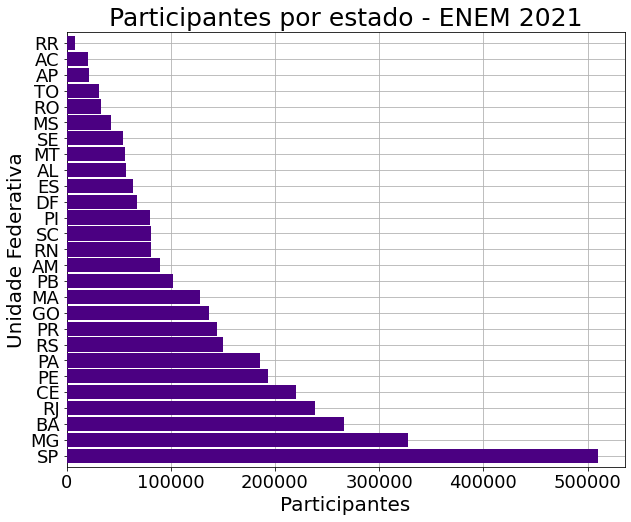

In [ ]:
insc_por_estado = dataset_enem["SG_UF_PROVA"].value_counts(sort = True )
fig, ax = plt.subplots(figsize=(10, 8))
fig = insc_por_estado.plot(kind='barh',
                      color = "Indigo",
                      fontsize = 18,
                      width = 0.9, #largura da barra
                      grid = True, zorder = 3) #grid atras das barras
ax.set_title('Participantes por estado - ENEM 2021', fontsize=25)
ax.set_xlabel("Participantes", fontsize = 20)
ax.set_ylabel("Unidade Federativa", fontsize = 20)

Pode-se notar que o estado de São Paulo teve mais inscritos que os demais estados. Podemos observar esses valores geográficamente, pelo mapa apresentado a seguir.



### Mapa UF da escola do Inscrito

- Materias de Apoio:

https://rodrigodutcosky.medium.com/mapas-coropl%C3%A9ticos-com-os-estados-do-brasil-em-python-b9b48c6db585


In [ ]:
#importando o shapefile do brasil
infos_ufs = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Live_Alura_2023_02_13/BR_UF_2020/BR_UF_2020.shp')

In [ ]:
#SG_UF_PROVA => Sigla da Unidade da Federação da escola
esc_p_UF = dataset_enem["SG_UF_PROVA"].value_counts() #quantidade por sigla

In [ ]:
dict_esc_p_UF = esc_p_UF.to_dict() # convertendo para o tipo dicionário

In [ ]:
# material apoio: https://acervolima.com/adicionar-uma-nova-coluna-no-quadro-de-dados-do-pandas-usando-um-dicionario/
# Mapping the dictionary keys to the data frame.
infos_ufs['SG_UF_PROVA'] = infos_ufs['SIGLA_UF'].map(dict_esc_p_UF) #incluindo uma coluna de quantidade de participantes por sigla no df infos_ufs

Text(0.5, 1.0, 'Total de Participantes por Estado')

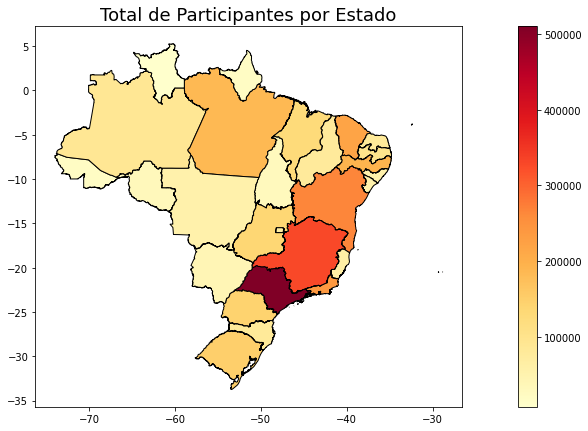

In [ ]:
# graficando o mapa do brasil. A intensidade da cor indica maior quantidade de inscritos por estado da escola.
# material apoio: https://rodrigodutcosky.medium.com/mapas-coropl%C3%A9ticos-com-os-estados-do-brasil-em-python-b9b48c6db585
infos_ufs.plot(column = 'SG_UF_PROVA',
               cmap = 'YlOrRd',
               figsize = (20,7),
               legend = True,
               edgecolor = 'black')
plt.title("Total de Participantes por Estado", fontsize = 18)


Comparado com os dados do [IBGE](https://www.gov.br/pt-br/noticias/financas-impostos-e-gestao-publica/2021/08/populacao-brasileira-chega-a-213-3-milhoes-de-habitantes-estima-ibge) podemos observar que a quantidade de inscritos é relativamente proporcional com a população dos estados.

Para a estimativa do IBGE, os estados de São Paulo e Minas Gerais são,  respectivamente, os mais populosos do Brasil, sendo estes os estados com a maior quantidade de inscritos. Porém, para o IBGE, o estado do Rio de Janeiro é o terceiro mais populoso e no ENEM tiveram mais inscritos bahianos que fluminenses em 2021.

### Treineiros e não Treineiros por estado

Para se inscrever no enem o participante precisou responder qual era o seu objetivo em realizar a prova.
Se estavam fazendo a prova para treinar suas habilidades/conhecimentos (TREINEIROS) ou se estavam fazendo a prova para concorrer à alguma vaga em universidade (NÃO TREINEIROS).

Para avaliar tais dados, foram realizados:

- Gráfico de rosca da porcentagem de treineiros e não treineiros.
- Gráfico de barra da quantidade de participantes por estado, com separação entre os treineiros e não treineiros.


#### Gráfico rosca

COLUNA UTILIZADA:
dataset_enem['IN_TREINEIRO']

VALORES:

0 - Não treineiros

1- Treineiros

In [ ]:
insc_NT, insc_T = dataset_enem['IN_TREINEIRO'].value_counts()

In [ ]:
insc_T_ou_NT = (100*insc_T/insc_tot, 100*insc_NT/insc_tot) #porcentagem
# obs: insc_tot declarado no primeiro gráfico de pizza

Text(0.5, 1.0, 'Porcentagem de Treineiros e Não Treineiros\n ENEM - 2021')

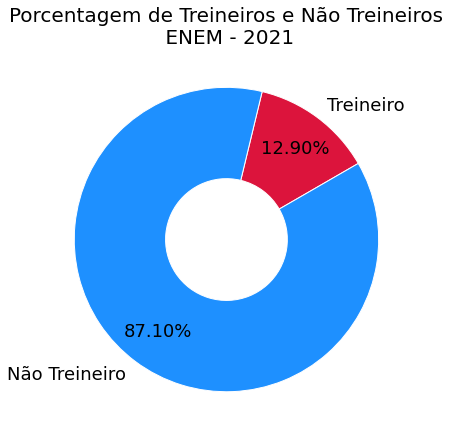

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7)) #LARGURA, ALTURA
labels = ("Treineiro", "Não Treineiro")
explode = (0, 0) #distâncias entre as fatias
ax.pie(insc_T_ou_NT,
       labels=labels,
       autopct="%.2f%%",
       shadow=False,
       explode=explode,
       startangle=30,
       pctdistance=0.75,
       colors=["Crimson", "Dodgerblue"],
       wedgeprops=dict(width=0.6, edgecolor='w'),
       textprops={'fontsize': 18})
ax.set_title('Porcentagem de Treineiros e Não Treineiros\n ENEM - 2021', fontsize=20)

Podemos ver que grande parte dos inscritos participaram do enem por algum motivo além de treinar seus conhecimentos (como para prestar vestibular ou conseguir o diploma do ensino médio). 
A grande divergência entre treineiros e não treineiro pode se dar pelo fato que em 2021 o Brasil enfrentava uma pandemia, desencorajando estudantes a prestar a prova apenas para testar os seus conhecimentos.


#### Gráfico de barras empilhadas (stacked bar)

Agora veremos como foi expressivo essa diferenta entre treineiros e não treineiros por estado.


In [ ]:
# separando por treineiro e não treineiro
nao_treineiro = dataset_enem[dataset_enem['IN_TREINEIRO'] == 0]
treineiro = dataset_enem[dataset_enem['IN_TREINEIRO'] == 1]

In [ ]:
#separando por estado
treineiro_por_estado = treineiro["SG_UF_PROVA"].value_counts(sort = True )
nao_treineiro_por_estado = nao_treineiro["SG_UF_PROVA"].value_counts(sort = True )

In [ ]:
#add name index
treineiro_por_estado.index.name = 'UF'
nao_treineiro_por_estado.index.name = 'UF'

In [ ]:
 # convertendo para o tipo dicionário
dict_n_treineiro_p_UF = nao_treineiro_por_estado.to_dict()

In [ ]:
treineiro_por_estado = treineiro_por_estado.to_frame() # convertendo a série em df
treineiro_por_estado.index.name = 'UF' #nomeando o index
#treineiro_por_estado.reset_index(inplace=True) # transformando o index em coluna

In [ ]:
nao_treineiro_por_estado = nao_treineiro_por_estado.to_frame() # convertendo a série em df
nao_treineiro_por_estado.index.name = 'UF' #nomeando o index
#nao_treineiro_por_estado.reset_index(inplace=True) # transformando o index em coluna

In [ ]:
treineiro_por_estado.rename(columns={'UF': 'Unidade Federativa', 'SG_UF_PROVA': 'Treineiros'}, inplace=True)
nao_treineiro_por_estado.rename(columns={'UF': 'Unidade Federativa', 'SG_UF_PROVA': 'Não Treineiros'}, inplace=True)

In [ ]:
treineiro_por_estado['Não Treineiros'] = nao_treineiro_por_estado.index.map(dict_n_treineiro_p_UF)

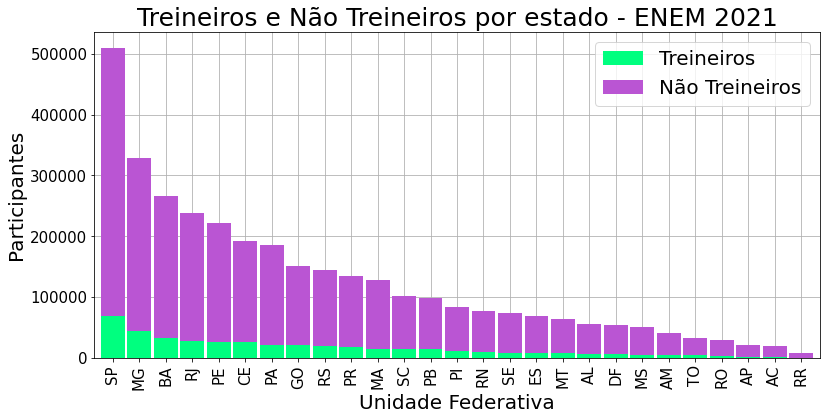

In [ ]:
#https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py
plt.rcParams["figure.figsize"] = (13,6)
treineiro_por_estado.plot(kind = "bar",
                          ylabel = "Participantes",
                          xlabel = "Unidades Federativas",
                          color=("SpringGreen", "MediumOrchid"),
                          fontsize = 15,
                          width = 0.9,
                          grid = True, zorder = 3,                                
                          stacked=True)
plt.title('Treineiros e Não Treineiros por estado - ENEM 2021', fontsize=25)
plt.ylabel("Participantes", fontsize = 20)
plt.xlabel("Unidade Federativa", fontsize = 20)
plt.legend(fontsize = 20)

Podemos ver que a quantidade de treineiros por estado é pouco expressiva em relação aos inscritos 'não treineiros'.

### Presença nas provas

- Ciências da Natureza
- Ciências Humanas
- Linguagens e Códigos
- Matemática

Os dados de Presença disponibilizados pelo governo federal separou os dados por prova e em três categorias, sendo elas: 

- Faltou
- Presente
- Eliminado

In [ ]:
#separando os dados utilizados
insc_presente_CN, insc_faltou_CN, insc_eliminado_CN = dataset_enem['TP_PRESENCA_CN'].value_counts()
insc_presente_CH, insc_faltou_CH, insc_eliminado_CH = dataset_enem['TP_PRESENCA_CH'].value_counts()
insc_presente_LC, insc_faltou_LC, insc_eliminado_LC = dataset_enem['TP_PRESENCA_LC'].value_counts()
insc_presente_MT, insc_faltou_MT, insc_eliminado_MT = dataset_enem['TP_PRESENCA_MT'].value_counts()


In [ ]:
col_names = ["Prova","Faltou", "Presente", "Eliminado"]

In [ ]:
#Dados em Porcentagem
data = [["CN", insc_faltou_CN*100/insc_tot, insc_presente_CN*100/insc_tot, insc_eliminado_CN*100/insc_tot],
        ["CH", insc_faltou_CH*100/insc_tot, insc_presente_CH*100/insc_tot, insc_eliminado_CH*100/insc_tot],
        ["LC", insc_faltou_LC*100/insc_tot, insc_presente_LC*100/insc_tot, insc_eliminado_LC*100/insc_tot],
        ["MT", insc_faltou_MT*100/insc_tot, insc_presente_MT*100/insc_tot, insc_eliminado_MT*100/insc_tot]]

In [ ]:
df_presenca = pd.DataFrame(data, columns = col_names)

In [ ]:
df_presenca

,Prova,Faltou,Presente,Eliminado
0,CN,33.704886,66.252369,0.042745
1,CH,29.718198,70.162150,0.119652
2,LC,29.718198,70.162150,0.119652
3,MT,33.704886,66.252369,0.042745


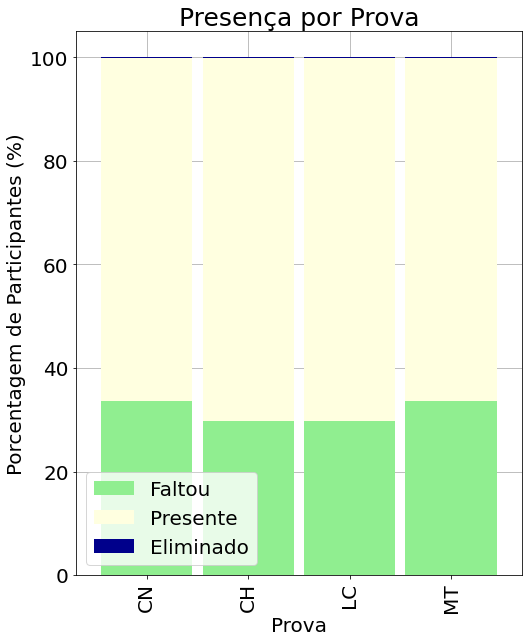

In [ ]:
plt.rcParams["figure.figsize"] = (8,10)
df_presenca.plot(kind = "bar",
                 x = 'Prova',
                 color=("lightgreen", "lightyellow", "DarkBlue"),
                 fontsize = 20,
                 width = 0.9,
                 grid = True, zorder = 3,                                
                 stacked=True)
plt.title('Presença por Prova', fontsize=25)
plt.ylabel("Porcentagem de Participantes (%)", fontsize = 20)
plt.xlabel("Prova", fontsize = 20)
plt.legend(fontsize = 20)


Podemos ver que poucas pessoas foram eliminadas comparado com os presentes e faltantes por prova.
Temos que no dia da prova de ciências naturais e matemática tiveram menos faltantes que no dia de ciências humanas e linguagens e código.

In [ ]:
#dados absolutos de eliminados

dict_eliminado= {"CN": insc_eliminado_CN,
        			    "CH": insc_eliminado_CH,
                  "LC": insc_eliminado_LC,
                  "MT": insc_eliminado_MT}


In [ ]:
dict_eliminado

{'CN': 1449, 'CH': 4056, 'LC': 4056, 'MT': 1449}

Para facilitar a visualização, será graficado a quantidade de eliminados por 100 inscritos.

In [ ]:
dict_eliminado_p100= {"CN": insc_eliminado_CN/100,
        			        "CH": insc_eliminado_CH/100,
                      "LC": insc_eliminado_LC/100,
                      "MT": insc_eliminado_MT/100}

In [ ]:

df_eliminados = pd.Series(dict_eliminado_p100)


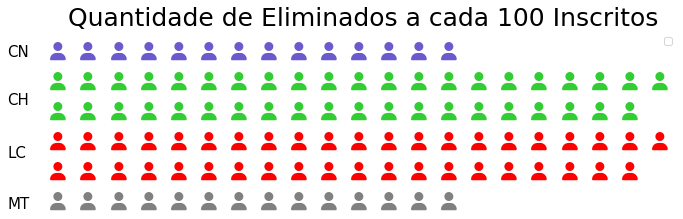

In [ ]:
# fonte: https://towardsdatascience.com/2-efficient-ways-of-creating-fancy-pictogram-charts-in-python-8b77d361d500
colors_list = ['slateblue', 'limegreen', 'red', 'grey']
colors = {df_eliminados.index[i]:colors_list[i] for i in range(len(df_eliminados))}

fig = plt.figure(FigureClass=Waffle,
                 figsize=(9,7),
                 values=dict_eliminado_p100,
                 columns=21,
                 vertical=True,
                 starting_location='NW',
                 block_arranging_style='new-line',
                 colors=list(colors.values()),
                 icons=['user','user', 'user', 'user'],
                 font_size=18)
plt.title('Quantidade de Eliminados a cada 100 Inscritos', fontsize=25)
fig.text(x=-0.05, y=0.625, s='CN', fontsize=15)
fig.text(x=-0.05, y=0.530, s='CH', fontsize=15)
fig.text(x=-0.05, y=0.425, s='LC', fontsize=15)
fig.text(x=-0.05, y=0.323, s='MT', fontsize=15)
plt.legend([])
plt.show()

OBS: Valores arredondados

Observando conjuntamente os presentes, ausentes e eliminados, podemos verificar que menos de um porcento dos inscritos por prova foram eliminados.

Observando separadamente apenas os eliminados, podemos ver que há grande diferença entre a quantidade de eliminados nas provas de CN e MT em relação aos eliminados das provas de CH e LC. Para as provas de CH e LC, podemos ver que tiveram aproximadamente o triplo.

### Pirâmide Etária

In [ ]:
# separando o dataset em homens e mulheres
insc_F = dataset_enem[dataset_enem['TP_SEXO'] == 'F']
insc_M = dataset_enem[dataset_enem['TP_SEXO'] == 'M']

In [ ]:
from pandas.core.dtypes.dtypes import Ordered
#separando por faixa Etária
insc_F_idade = insc_F["TP_FAIXA_ETARIA"].value_counts()
insc_M_idade = insc_M["TP_FAIXA_ETARIA"].value_counts()

In [ ]:
insc_F_idade = insc_F_idade.to_frame() # convertendo a série em df
insc_M_idade = insc_M_idade.to_frame() # convertendo a série em df

In [ ]:
#add name index
insc_F_idade.index.name = 'Age'
insc_M_idade.index.name = 'Age'

insc_F_idade.reset_index(inplace=True)
insc_M_idade.reset_index(inplace=True)

In [ ]:
insc_F_idade.rename(columns={'Age': 'Idade', 'TP_FAIXA_ETARIA': 'Feminino'}, inplace=True)
insc_M_idade.rename(columns={'Age': 'Idade', 'TP_FAIXA_ETARIA': 'Masculino'}, inplace=True)

In [ ]:
insc_F_idade = insc_F_idade.sort_values(by='Idade')
insc_M_idade = insc_M_idade.sort_values(by='Idade')

In [ ]:
insc_fx_etaria = insc_M_idade.join(insc_F_idade["Feminino"])

In [ ]:
#informação presente no dicionário disponibilizado pelo governo junto ao dataset
insc_fx_etaria["Faixa Etária"] = ["17-", "17", "18", "19", "20", "21", "22" ,"23", "24", "25", "26 - 30", "31 - 35", "36 - 40", "41 - 45", "46 - 50", "51 - 55", "56 - 60", "61 - 65", "66 - 70", "70+"]

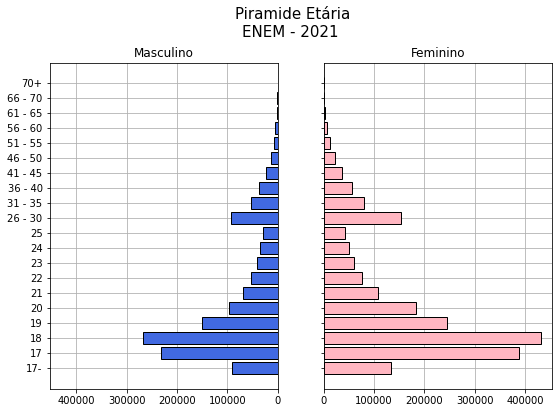

In [ ]:
#https://www.statology.org/population-pyramid-python/
#define x and y limits
y = range(0, len(insc_fx_etaria))
x_male = insc_fx_etaria['Masculino']
x_female = insc_fx_etaria['Feminino']

x_max = max(x_female.max(),x_male.max())*1.05 #x_max é um pouco maior que o valor mais alto
#ambos os gráficos com a mesma escala

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6)) #subplot com dois gráficos, cada um em uma coluna

#specify background color and plot title
#fig.patch.set_facecolor('xkcd:white') #muda cor do fundo
plt.figtext(.5,.9,"Piramide Etária\nENEM - 2021 \n", fontsize=15, ha='center')
    
#construindo os gráficos
# axes[0] -> gráfico da esqueda (masculino)
axes[0].barh(y, x_male, align='center', color='royalblue',edgecolor = 'black')
axes[0].set(title='Masculino')
axes[0].set_xlim([0, x_max])

#axes[1] -> grafico da direita (feminino)
axes[1].barh(y, x_female, align='center', color='lightpink',edgecolor = 'black')
axes[1].set(title='Feminino')
axes[1].set_xlim([0, x_max])

#adjust grid parameters and specify labels for y-axis
axes[0].grid() #inserindo o grid
axes[0].set_axisbelow(True) #colocando o grid atrás das barras
axes[0].set(yticks=y, yticklabels=insc_fx_etaria['Faixa Etária']) #posição das linhas do grid
axes[0].invert_xaxis() #invertendo o primeiro gráfico para ficar espelhado
axes[1].grid() #inserindo o grid
axes[1].set_axisbelow(True) #colocando o grid atrás das barras

Com ambos os gráficos (masculino e feminino) estão na mesma escala, podemos observar, como já mostrado anteriormente, que há mais pessoas que se identificam com o gênero feminino que o masculino.

Porém, podemos observar o mesmo comportamento em ambos os gráficos, com as maiores quantidade de inscritos com a idade de 18 anos.
Nota-se um comportamento de dente de serra, com um pico na idade de 18 anos e outro, menor, na faixa etária de 26-30 anos. Esse comportamento se dá pela mudança de escala, que a partir dos 26 anos, são agrupados em conjunto de cinco idades.

A maior concentração de inscritos estão na adolescência e início da vida adulta, porém há inscritos adultos e idosos, mostrando a importância do ENEM para todas as faixas etárias, sendo essa importância tanto para o ingresso no ensino superior como também para adquirir o diploma do ensino médio.

### Cor / Raça

In [ ]:
dataset_enem["TP_COR_RACA"].value_counts()

3    1457454
1    1362256
2     411302
0      71149
4      68491
5      19175
6          5
Name: TP_COR_RACA, dtype: int64

De acordo com os dados disponibilizados junto ao dataset, temos a seguinte legenda:

0 - Não Declarado

1 - Branca

2 - Preta

3 - Parda

4 - Amarela

5 - Indígena

6 - Não Informado


In [ ]:
#separando os dados por cor/raça
insc_parda, insc_branca, insc_preta, insc_n_declarado, insc_amarela, insc_indigena, insc_cor_n_informado =  dataset_enem["TP_COR_RACA"].value_counts()
#calculando a porcentagem
insc_p_cor_porcent = (insc_parda*100/insc_tot, insc_branca*100/insc_tot, insc_preta*100/insc_tot, insc_n_declarado*100/insc_tot, insc_amarela*100/insc_tot, insc_indigena*100/insc_tot, insc_cor_n_informado*100/insc_tot)

In [ ]:
cor = ["Parda","Branca","Preta","Não\nDeclar.\n","Amarelo","Indígena","Não\nInfor."] #\n -> quebra de linha

In [ ]:
y_pos = np.arange(len(cor))

[Text(0, 0, '42.9949%'),
 Text(0, 0, '40.1865%'),
 Text(0, 0, '12.1334%'),
 Text(0, 0, '2.0989%'),
 Text(0, 0, '2.0205%'),
 Text(0, 0, '0.5657%'),
 Text(0, 0, '0.0001%')]

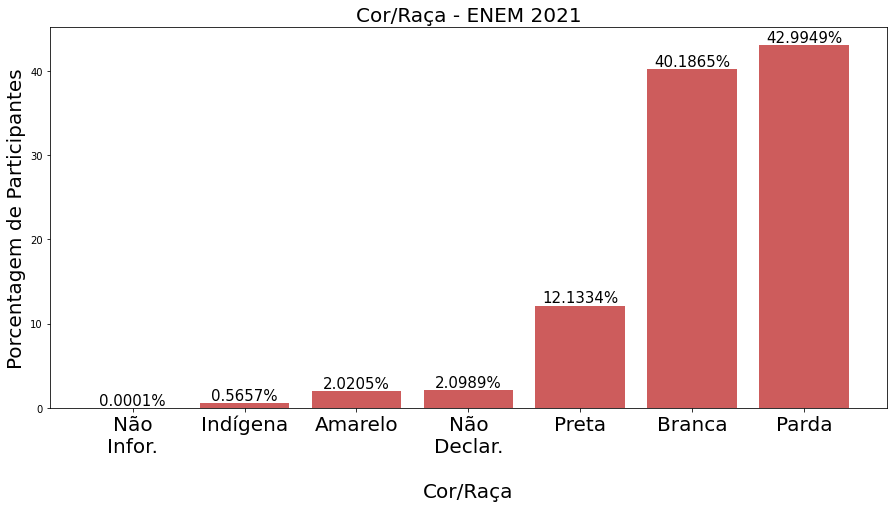

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))

hbars = ax.bar(y_pos, insc_p_cor_porcent,color = "IndianRed") 
ax.set_xticks(y_pos, labels=cor, fontsize = 20)
ax.invert_xaxis()  
ax.set_xlabel('Cor/Raça', fontsize = 20)
ax.set_ylabel('Porcentagem de Participantes', fontsize = 20)
ax.set_title('Cor/Raça - ENEM 2021', fontsize = 20)
ax.bar_label(hbars, fmt='%.4f%%', fontsize = 15)

Podemos ver que quase a totalidade dos inscritos e inscritas são pardas e brancas, o que condiz com os dados dispobilizados no [Educa IBGE](https://educa.ibge.gov.br/jovens/conheca-o-brasil/populacao/18319-cor-ou-raca.html#:~:text=O%20IBGE%20pesquisa%20a%20cor,9%2C1%25%20como%20pretos.).

De acordo com dados da Pesquisa Nacional por Amostra de Domicílios (PNAD Contínua) 2021, 43,0% dos brasileiros se declararam como brancos, 47,0% como pardos e 9,1% como pretos.

Podemos ver, porém que a porcentagem de pardos e brancos declarados pela PNAD são maiores que as porcentagens de pardos e brancos declarados na inscrição no ENEM. Já a porcentagem de pessoas declaradas pretas é maior no ENEM que no PNAD.



## Status de Conclusão do Ensino Médio

In [ ]:
dataset_enem["TP_ST_CONCLUSAO"].value_counts()

1    1789372
2    1150857
3     437190
4      12413
Name: TP_ST_CONCLUSAO, dtype: int64

1 - Já Concluiu

2 - Conclusão em 2021

3 - Conclusão após 2021

4 - Não Concluiu e não está cursando

In [ ]:
insc_ja_concluiu, insc_conclusao_2021, insc_conclusao_apos_2021, insc_nao_concl_nao_cursando = dataset_enem["TP_ST_CONCLUSAO"].value_counts()
insc_p_conclusao = (insc_ja_concluiu*100/insc_tot, insc_conclusao_2021*100/insc_tot, insc_conclusao_apos_2021*100/insc_tot, insc_nao_concl_nao_cursando*100/insc_tot)

Text(0.5, 1.0, 'Status de Conclusão do Ensino Médio dos inscritos ENEM - 2021')

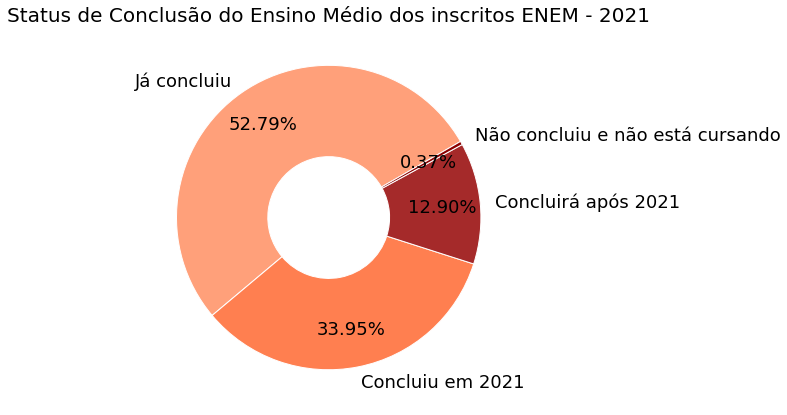

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7)) #LARGURA, ALTURA
labels = ("Já concluiu", "Concluiu em 2021", "Concluirá após 2021", "Não concluiu e não está cursando")
#explode = (0, 0) #distâncias entre as fatias
ax.pie(insc_p_conclusao,
       labels=labels,
       autopct="%.2f%%",
       shadow=False,
       #explode=explode,
       startangle=30,
       pctdistance=0.75,
       colors=["LightSalmon", "Coral", "Brown","DarkRed" ],
       wedgeprops=dict(width=0.6, edgecolor='w'),
       textprops={'fontsize': 18})
ax.set_title('Status de Conclusão do Ensino Médio dos inscritos ENEM - 2021', fontsize=20)

### Redação

Avaliação dos resultados da redação por região

In [ ]:
dados_geral_redacao = dataset_enem[["SG_UF_PROVA","NU_NOTA_REDACAO"]] #separando os daods que serão utilizados

In [ ]:
#dicionário com a região de cada estado
states = {
    'AC': 'Norte',
    'AL': 'Nordeste',
    'AP': 'Norte',
    'AM': 'Norte',
    'BA': 'Nordeste',
    'CE': 'Nordeste',
    'DF': 'Centro Oeste',
    'ES': 'Sudeste',
    'GO': 'Centro Oeste',
    'MA': 'Nordeste',
    'MT': 'Centro Oeste',
    'MS': 'Centro Oeste',
    'MG': 'Sudeste',
    'PA': 'Norte',
    'PB': 'Nordeste',
    'PR': 'Sul',
    'PE': 'Nordeste',
    'PI': 'Nordeste',
    'RJ': 'Sudeste',
    'RN': 'Nordeste',
    'RS': 'Sul',
    'RO': 'Norte',
    'RR': 'Norte',
    'SC': 'Sul',
    'SP': 'Sudeste',
    'SE': 'Nordeste',
    'TO': 'Norte'
}

In [ ]:
dados_geral_redacao['REGIAO'] = dados_geral_redacao['SG_UF_PROVA'].map(states) #acrescentando a informação da região no data frame 'dados_geral_redacao'

<ipython-input-75-bb35fdf40738>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_geral_redacao['REGIAO'] = dados_geral_redacao['SG_UF_PROVA'].map(states) #acrescentando a informação da região no data frame 'dados_geral_redacao'


In [ ]:
#separando os dados por região
dados_redacao_Sul      = dados_geral_redacao["NU_NOTA_REDACAO"][dados_geral_redacao["REGIAO"]=="Sul"]
dados_redacao_Sudeste  = dados_geral_redacao["NU_NOTA_REDACAO"][dados_geral_redacao["REGIAO"]=="Sudeste"]
dados_redacao_Centro_O = dados_geral_redacao["NU_NOTA_REDACAO"][dados_geral_redacao["REGIAO"]=="Centro Oeste"]
dados_redacao_Nordeste = dados_geral_redacao["NU_NOTA_REDACAO"][dados_geral_redacao["REGIAO"]=="Nordeste"]
dados_redacao_Norte    = dados_geral_redacao["NU_NOTA_REDACAO"][dados_geral_redacao["REGIAO"]=="Norte"]

In [ ]:
# retirando os valores ausentes
dados_redacao_Sul.dropna(inplace = True)
dados_redacao_Sudeste.dropna(inplace = True)
dados_redacao_Centro_O.dropna(inplace = True)
dados_redacao_Nordeste.dropna(inplace = True)
dados_redacao_Norte.dropna(inplace = True)

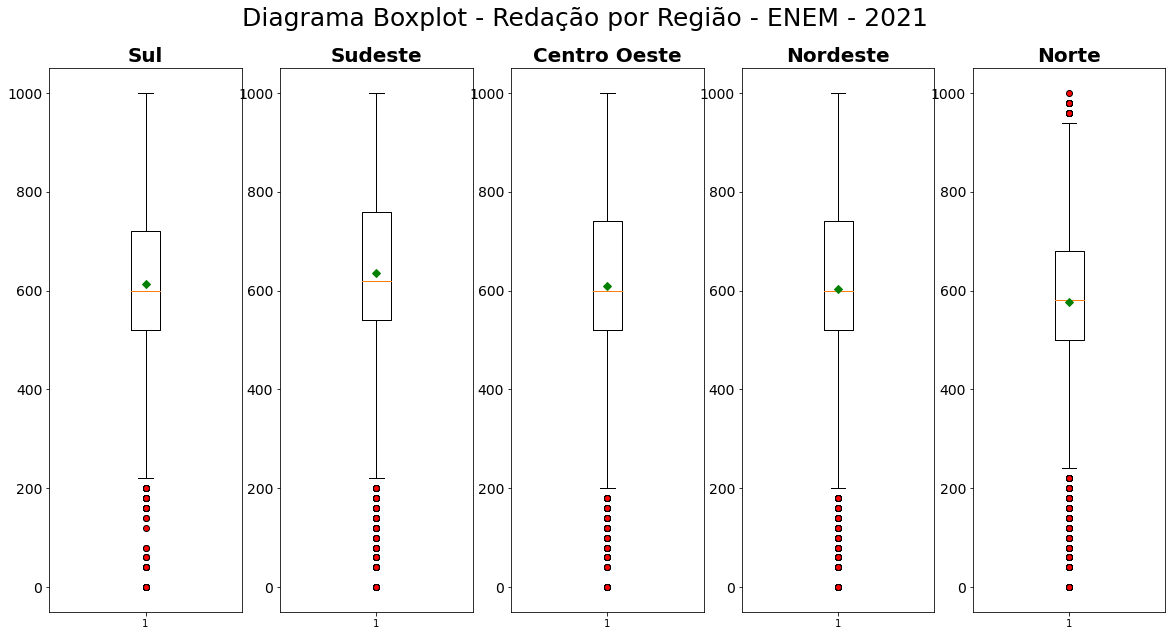

In [ ]:
## BOXPLOT
#https://towardsdatascience.com/creating-boxplots-of-well-log-data-using-matplotlib-in-python-34c3816e73f4
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

fig, axs = plt.subplots(1, 5, figsize=(20,10)) #(LINHA, COLUNA, FIGSIZE = TAMANNHO)
plt.figtext(.5,.9,"Diagrama Boxplot - Redação por Região - ENEM - 2021 \n", fontsize=25, ha='center')
axs[0].boxplot(dados_redacao_Sul, flierprops=red_circle,showmeans=True, meanprops=mean_shape)
axs[0].set_title("Sul", fontsize=20, fontweight='bold')
axs[0].tick_params(axis='y', labelsize=14)

axs[1].boxplot(dados_redacao_Sudeste, flierprops=red_circle,showmeans=True, meanprops=mean_shape)
axs[1].set_title("Sudeste", fontsize=20, fontweight='bold')
axs[1].tick_params(axis='y', labelsize=14)

axs[2].boxplot(dados_redacao_Centro_O, flierprops=red_circle,showmeans=True, meanprops=mean_shape)
axs[2].set_title("Centro Oeste", fontsize=20, fontweight='bold')
axs[2].tick_params(axis='y', labelsize=14)

axs[3].boxplot(dados_redacao_Nordeste, flierprops=red_circle,showmeans=True, meanprops=mean_shape)
axs[3].set_title("Nordeste", fontsize=20, fontweight='bold')
axs[3].tick_params(axis='y', labelsize=14)

axs[4].boxplot(dados_redacao_Norte, flierprops=red_circle,showmeans=True, meanprops=mean_shape)
axs[4].set_title("Norte", fontsize=20, fontweight='bold')
axs[4].tick_params(axis='y', labelsize=14)
    


OBS: Como interpretar:
- RETÂNGULO (CAIXA): Intervalo interquantilico, representa 50% dos dados.
  - A aresta superior da caixa representa o 3º quartil (75% dos dados)
  - A aresta inferir da caixa representa o 1º quartil (25% dos dados)
- LINHA AMARELA = 2º Quartil (mediana- 50% dos dados) 
- LOSANGO VERDE = Média
- LIMITE DA CAUDA INFERIOR = 1º quartil - 1.5 * Intervalo interquantilico
- LIMITE DA CAUDA SUPERIOR = 3º quartil + 1.5 * Intervalo interquantilico
- PONTOS VERMELHOS: *Outliers*:
  - outliers superiores: valores superiores ao limite da cauda superior
  - outliers inferior: valores inferior ao limite da cauda inferior

Nos diagramas apresentados acima podemos ver que todas as regiões apresentaram outliers inferiores nas notas da redação, indicando que notas baixas na redação são eventos raros, ficando fora do limite da cauda inferior.

Porém para a região norte, podemos notar tambem outliers superiores, indicando que notas extremamente alta são discrepantes para a distribuição.

A região norte também apresentou a menor dispersão dos dados, indicado pelo tamanho da caixa, sendo a caixa com o intervalo de notas mais baixo dentre as regiões.

A região sudeste apresentou a caixa mais elevada, bem como maior média e mediana, indicando que de forma geral a região apresenta notas mais elevadas na redação do ENEM 2021.

Exceto pela região norte, que apresentou simetria na caixa do diagrama, as demais regiões apresentou assimetria, onde os intervalos entre o 1º e 2º quartil são menores que entre o 2º e o 3º, indicando maior dispersão entre os calores de noas acima da mediana atté o limiar de 75%.


No gráfico a seguir será avaliado a quantidade de notas máximas por região

In [ ]:
dict_redacao_1000= {"SUL":          len(dados_redacao_Sul[dados_redacao_Sul==1000]),
        			      "SUDESTE":      len(dados_redacao_Sudeste[dados_redacao_Sudeste==1000]),
                    "CENTRO-OESTE": len(dados_redacao_Centro_O[dados_redacao_Centro_O==1000]),
                    "NORDESTE":     len(dados_redacao_Nordeste[dados_redacao_Nordeste==1000]),
                    "NORTE":        len(dados_redacao_Norte[dados_redacao_Norte==1000])}

In [ ]:
df_redacao_1000 = pd.Series(dict_redacao_1000)

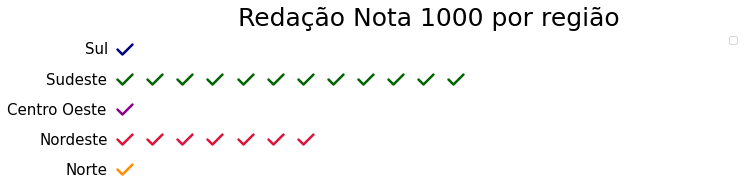

In [ ]:
# fonte: https://towardsdatascience.com/2-efficient-ways-of-creating-fancy-pictogram-charts-in-python-8b77d361d500
colors_list = ['Navy', 'DarkGreen', 'DarkMagenta' ,'Crimson', 'DarkOrange']
colors = {df_redacao_1000.index[i]:colors_list[i] for i in range(len(df_redacao_1000))}

fig = plt.figure(FigureClass=Waffle,
                 figsize=(9,7),
                 values=dict_redacao_1000,
                 columns=21,
                 vertical=True,
                 starting_location='NW',
                 block_arranging_style='new-line',
                 colors=list(colors.values()),
                 icons=['check','check', 'check', 'check', 'check'], #https://fontawesome.com/
                 font_size=20)
plt.title('Redação Nota 1000 por região', fontsize=25)
fig.text(x=-0.03, y=0.600, s='Sul', fontsize=15)
fig.text(x=-0.09, y=0.540, s='Sudeste', fontsize=15)
fig.text(x=-0.15, y=0.480, s='Centro Oeste', fontsize=15)
fig.text(x=-0.10, y=0.420, s='Nordeste', fontsize=15)
fig.text(x=-0.06, y=0.360, s='Norte', fontsize=15)
plt.legend([])
plt.show()

Como podemos observar, a região sudeste apresentou a maior quantidade de notas máxima na redação do ENEM 2021, com 12 notas 1000, seguido pelo nordeste com 7 notas máximas. As demais regiões apresentaram apenas uma nota máxima.
Como observado anteriormente, o diagrama boxplot já havia indicado que na região norte só ocorreu uma redação com nota máxima, mas devido ao deslocamento superior do diagrama, não foi presentado outlier para o valor máximo de redação para a região sul e centro oeste, isso ocorreu pois, apesar da baixa ocorrência de notas máximas, foram apresentadas quantidade relevante de notas altas.

## Notas das provas por região

In [ ]:
dados_geral_provas = dataset_enem[["SG_UF_PROVA","NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT"]].dropna() #separando as colunas de interesse e retirando valores inexistentes

In [ ]:
dados_geral_provas['REGIAO'] = dados_geral_provas['SG_UF_PROVA'].map(states)

In [ ]:
dados_geral_provas["MD_NOTAS"] = dados_geral_provas[["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT"]].mean(axis =1) #média dos valores das provas
#axis = 1 -> média feita por linha
# se fosse axis = 0 -> por coluna
# se tiver um valor NaN a média será NaN, assim, se o inscrito perdeu uma prova, a média será NaN

In [ ]:
dados_Med_Provas_Sul      = dados_geral_provas[dados_geral_provas["REGIAO"]=="Sul"]
dados_Med_Provas_Sudeste  = dados_geral_provas[dados_geral_provas["REGIAO"]=="Sudeste"]
dados_Med_Provas_Centro_O = dados_geral_provas[dados_geral_provas["REGIAO"]=="Centro Oeste"]
dados_Med_Provas_Nordeste = dados_geral_provas[dados_geral_provas["REGIAO"]=="Nordeste"]
dados_Med_Provas_Norte    = dados_geral_provas[dados_geral_provas["REGIAO"]=="Norte"]

(0.0, 1000.0)

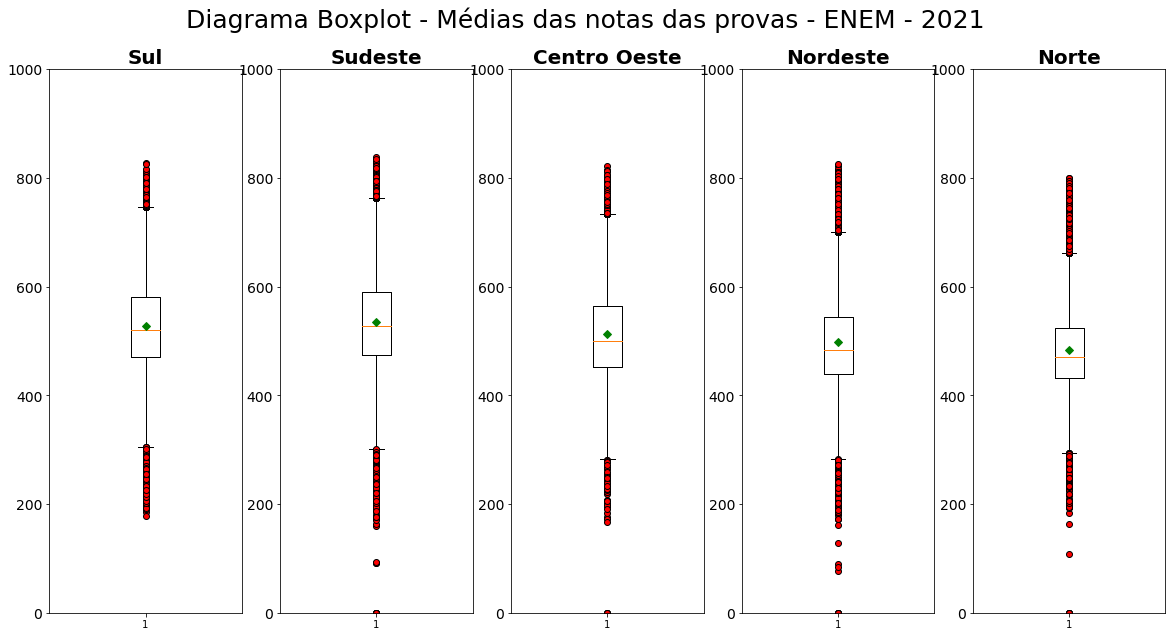

In [ ]:
## BOXPLOT
#https://towardsdatascience.com/creating-boxplots-of-well-log-data-using-matplotlib-in-python-34c3816e73f4
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

fig, axs = plt.subplots(1, 5, figsize=(20,10)) #(LINHA, COLUNA, FIGSIZE = TAMANNHO)
plt.figtext(.5,.9,"Diagrama Boxplot - Médias das notas das provas - ENEM - 2021 \n", fontsize=25, ha='center')
axs[0].boxplot(dados_Med_Provas_Sul['MD_NOTAS'], flierprops=red_circle,showmeans=True, meanprops=mean_shape)
axs[0].set_title("Sul", fontsize=20, fontweight='bold')
axs[0].tick_params(axis='y', labelsize=14)
axs[0].set_ylim([0, 1000])

axs[1].boxplot(dados_Med_Provas_Sudeste['MD_NOTAS'], flierprops=red_circle,showmeans=True, meanprops=mean_shape)
axs[1].set_title("Sudeste", fontsize=20, fontweight='bold')
axs[1].tick_params(axis='y', labelsize=14)
axs[1].set_ylim([0, 1000])

axs[2].boxplot(dados_Med_Provas_Centro_O['MD_NOTAS'], flierprops=red_circle,showmeans=True, meanprops=mean_shape)
axs[2].set_title("Centro Oeste", fontsize=20, fontweight='bold')
axs[2].tick_params(axis='y', labelsize=14)
axs[2].set_ylim([0, 1000])

axs[3].boxplot(dados_Med_Provas_Nordeste['MD_NOTAS'], flierprops=red_circle,showmeans=True, meanprops=mean_shape)
axs[3].set_title("Nordeste", fontsize=20, fontweight='bold')
axs[3].tick_params(axis='y', labelsize=14)
axs[3].set_ylim([0, 1000])

axs[4].boxplot(dados_Med_Provas_Norte['MD_NOTAS'], flierprops=red_circle,showmeans=True, meanprops=mean_shape)
axs[4].set_title("Norte", fontsize=20, fontweight='bold')
axs[4].tick_params(axis='y', labelsize=14)
axs[4].set_ylim([0, 1000])   


#Gráfico Radar

In [ ]:
#https://plotly.com/python/radar-chart/

In [ ]:
med_prova_por_reg_sul = dados_Med_Provas_Sul[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','MD_NOTAS']].mean(axis = 0)
med_prova_por_reg_sudeste = dados_Med_Provas_Sudeste[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','MD_NOTAS']].mean(axis = 0)
med_prova_por_reg_centro_o = dados_Med_Provas_Centro_O[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','MD_NOTAS']].mean(axis = 0)
med_prova_por_reg_nordeste = dados_Med_Provas_Nordeste[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','MD_NOTAS']].mean(axis = 0)
med_prova_por_reg_norte = dados_Med_Provas_Norte[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','MD_NOTAS']].mean(axis = 0)

In [ ]:
import plotly.graph_objects as go

categories = ['C. Naturais','C. Humanas','Ling. Códigos',
              'Matemática', 'Média das Provas']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=med_prova_por_reg_sul,
      theta=categories,
      fill='toself',
      name='Sul'
))

fig.add_trace(go.Scatterpolar(
      r=med_prova_por_reg_sudeste,
      theta=categories,
      fill='toself',
      name='Sudeste'
))

fig.add_trace(go.Scatterpolar(
      r=med_prova_por_reg_centro_o,
      theta=categories,
      fill='toself',
      name='Centro Oeste'
))

fig.add_trace(go.Scatterpolar(
      r=med_prova_por_reg_nordeste,
      theta=categories,
      fill='toself',
      name='Nordeste'
))

fig.add_trace(go.Scatterpolar(
      r=med_prova_por_reg_norte,
      theta=categories,
      fill='toself',
      name='Norte'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[440, 570]
    )),
  showlegend=False
)

fig.show()